In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet

In [7]:
df=pd.read_csv("C:\\Users\\Expert\\Downloads\\winequality-red.csv")

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [14]:
df.shape

(1599, 12)

In [15]:
duplicate_df=df[df.duplicated()]

In [16]:
duplicate_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [17]:
duplicate_df.shape

(240, 12)

In [18]:
duplicate_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [19]:
df.shape

(1599, 12)

In [20]:
df=df.drop_duplicates()
df.shape

(1359, 12)

In [21]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

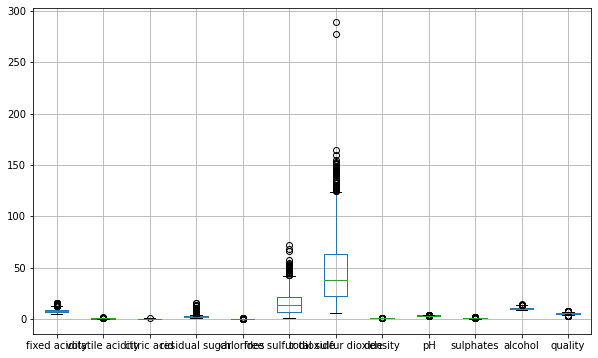

In [22]:
df.boxplot(figsize=(10,6))

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000
density                  0.00222
pH                       0.19000
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64

In [24]:
o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
o_df.shape

(1005, 12)

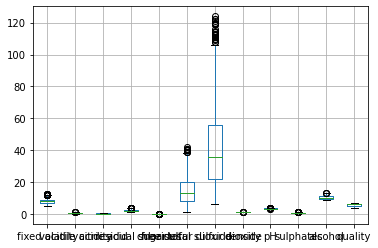

In [25]:
o_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A67F30A90>,
      dtype=object)

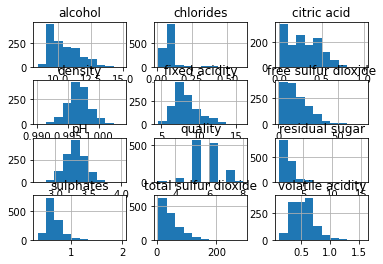

In [26]:
df.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A68439F40>,
      dtype=object)

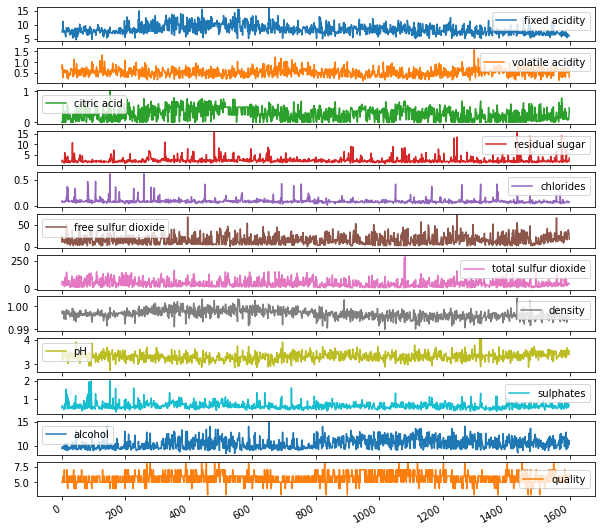

In [27]:
df.plot(subplots=True,figsize=(10,10))

In [29]:
import seaborn as sns

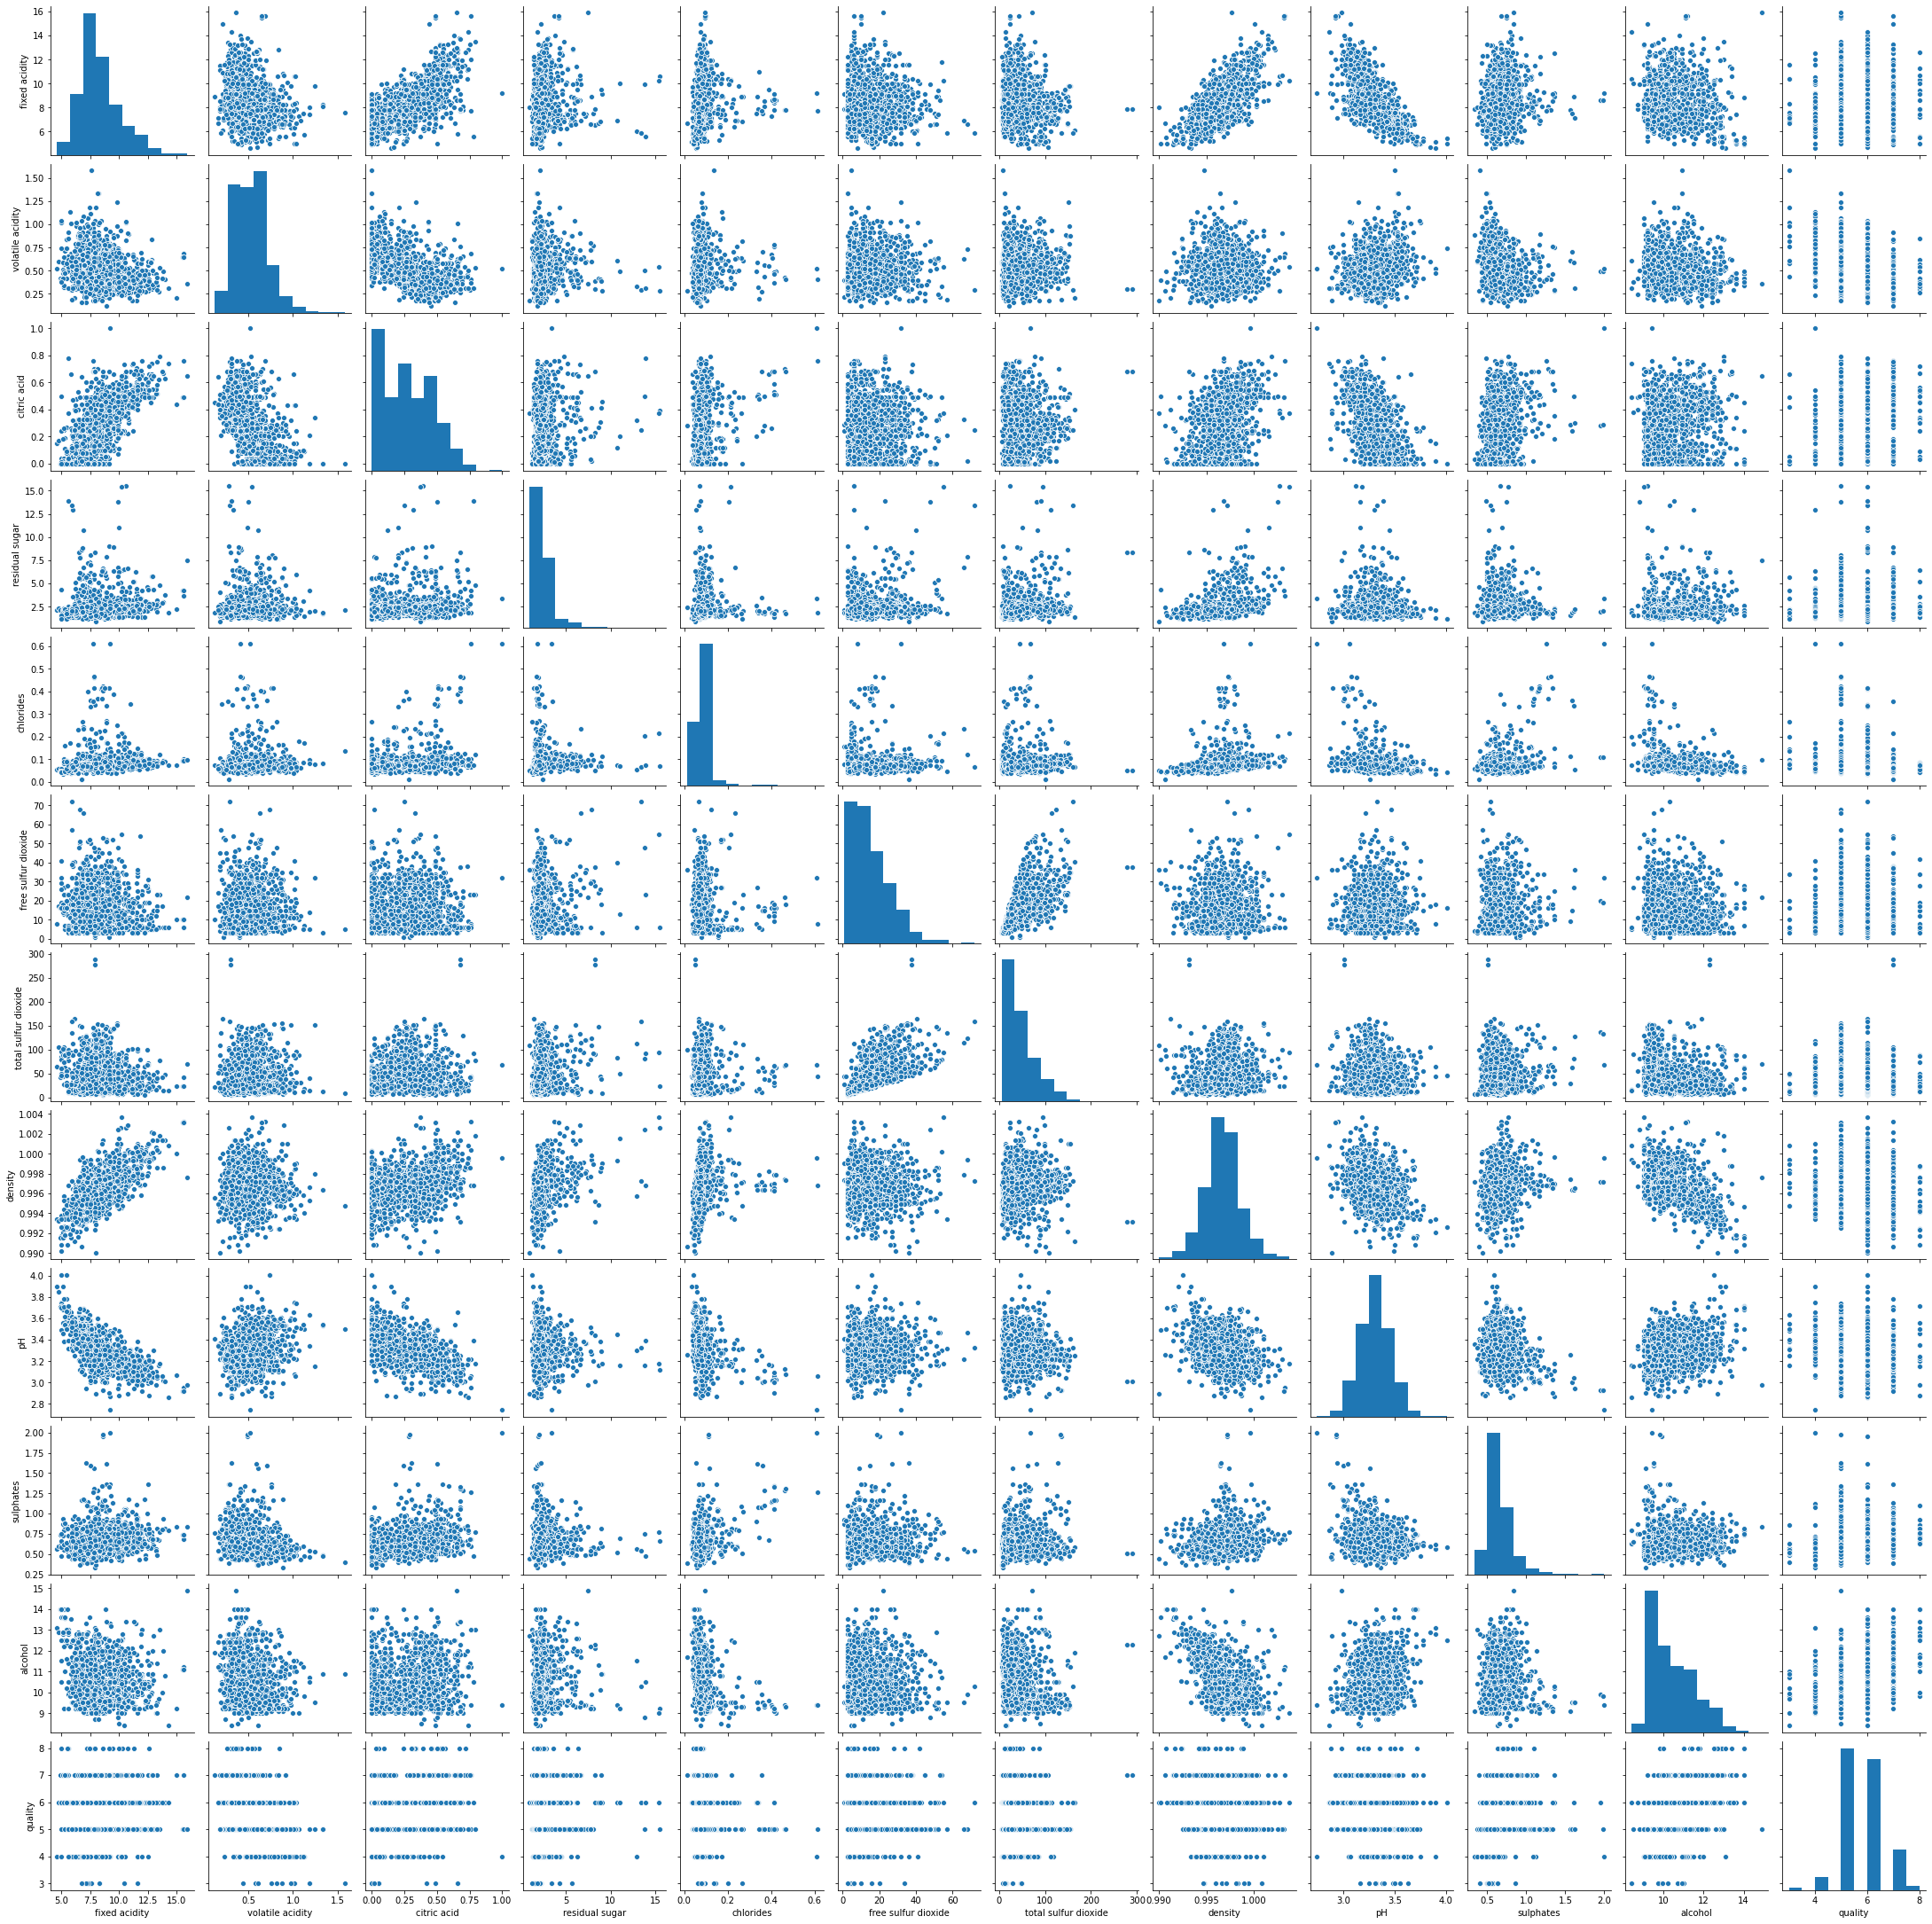

In [30]:
sns.pairplot(df)

In [31]:
x=df.drop(columns="quality")
y=df["quality"]

In [32]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [33]:
model.coef_

array([ 1.25660852e-02, -1.12043699e+00, -1.64242301e-01,  7.10798353e-03,
       -1.93025669e+00,  3.34295187e-03, -2.70726666e-03, -8.99042958e+00,
       -4.58486885e-01,  9.14702306e-01,  2.89530709e-01])

In [34]:
model.intercept_

13.237941045340836

In [35]:
ypred=model.predict(x)

In [36]:
ypred

array([5.0120376 , 5.11205476, 5.19440324, ..., 5.94517011, 5.44314221,
       6.01592572])

In [37]:
model.score(x,y)

0.3637997412899059

In [38]:
mae=mean_absolute_error(y,ypred)
mae

0.5067213236177147

In [39]:
mse=mean_squared_error(y,ypred)
mse

0.43120484332701403

In [40]:
rmse=np.sqrt(mse)
rmse

0.656661894224885

In [41]:
r2_score(y,ypred)

0.3637997412899059

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [43]:
xtrain.shape

(1087, 11)

In [44]:
xtest.shape

(272, 11)

In [45]:
#linear regression model
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print("LR Coefficients:",lr.coef_)

LR Coefficients: [ 0.00771767 -1.14074031 -0.19424152 -0.00192132 -1.55921299  0.00632
 -0.00337686  0.53027228 -0.62180663  1.00485383  0.3041901 ]


In [46]:
#ridge model
ridge=Ridge(alpha=0.1)
ridge.fit(xtrain,ytrain)
print("Ridge Coefficients:",ridge.coef_)

Ridge Coefficients: [ 0.00911163 -1.14220807 -0.19593153 -0.00187198 -1.46996331  0.00632863
 -0.003362   -0.00199011 -0.60758011  0.99302721  0.30455307]


In [47]:
#Lasso Model
lasso=Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
print("Lasso Coefficients:",lasso.coef_)

Lasso Coefficients: [ 0.04337517 -0.          0.         -0.         -0.          0.00867696
 -0.00413718 -0.         -0.          0.          0.26721233]


#result on training and testing dataset

In [48]:
print('Linear Regression on training data',lr.score(xtrain,ytrain))
print('Linear Regression on testing data',lr.score(xtest,ytest))
print('Ridge Regression on training data',ridge.score(xtrain,ytrain))
print('Rigde Regression on testing data',ridge.score(xtest,ytest))
print('Lasso Regression on training data',lasso.score(xtrain,ytrain))
print('Lasso Regression on testing data',lasso.score(xtest,ytest))

Linear Regression on training data 0.3831536380812838
Linear Regression on testing data 0.256545177804372
Ridge Regression on training data 0.3831340509829674
Rigde Regression on testing data 0.25587881452782124
Lasso Regression on training data 0.2514521010678966
Lasso Regression on testing data 0.21227664122855017


In [51]:
from sklearn.linear_model import ElasticNetCV

In [54]:
alpha=[0.0001,0.001,0.01,0.1,1,1.5,10]

In [67]:
scores={}
def get_best_alpha(alpha):
    for i in alpha:
        model=ElasticNet(alpha=i)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        mse=mean_squared_error(ytest,ypred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(ytest,ypred)
        scores[i]=model.score(xtest,ytest)
        print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(xtest,ytest),mse,rmse,mae))
    return max(scores, key= lambda x: scores[x])

    

In [68]:
print("Best Alpha is :",get_best_alpha(alpha))

 For Alpha = 0.0001 | R-square :0.25605669419665644 MSE :0.4471764537248661 RMSE :0.6687125344457557 MAE:0.5247815741938997 
 For Alpha = 0.001 | R-square :0.25175891021436136 MSE :0.44975980622644274 RMSE :0.6706413394851549 MAE:0.5269199760002451 
 For Alpha = 0.01 | R-square :0.2526039490103773 MSE :0.44925186234266207 RMSE :0.6702625324025371 MAE:0.5266036584807272 
 For Alpha = 0.1 | R-square :0.21237195521573304 MSE :0.4734348883488475 RMSE :0.688066049408665 MAE:0.5484679294793697 
 For Alpha = 1 | R-square :0.012371447744581765 MSE :0.5936530783324868 RMSE :0.7704888567218132 MAE:0.6303333471963636 
 For Alpha = 1.5 | R-square :0.021447614818734584 MSE :0.5881974902870358 RMSE :0.7669403433690497 MAE:0.6328372388299126 
 For Alpha = 10 | R-square :0.0013611971791802624 MSE :0.6002712235110925 RMSE :0.7747717234844678 MAE:0.6577375810913165 
Best Alpha is : 0.0001


In [55]:
model=ElasticNetCV(alphas=alpha,cv=5)
model.fit(xtrain,ytrain)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 1.5, 10], cv=5)

In [56]:
model.alpha_

0.0001

In [57]:
model.intercept_

4.575009396269843

In [58]:
ypred=model.predict(xtest)

In [60]:
ypred

array([6.08343616, 5.02690079, 6.78667147, 6.09485592, 5.37623033,
       6.47724852, 5.65518752, 6.56777096, 6.50851689, 6.09207846,
       5.32349575, 5.61156136, 5.15975495, 5.23301864, 4.92104966,
       6.32050215, 5.68371412, 5.83282843, 5.24034481, 5.51337971,
       6.15459504, 5.41919509, 5.38510374, 6.20637009, 5.76548767,
       5.66605949, 5.29554507, 5.38495654, 5.09204097, 5.55795394,
       5.11405304, 6.9594711 , 6.48492279, 5.20797865, 4.95333865,
       5.04221321, 5.52755294, 5.14780929, 5.53285146, 5.51615525,
       4.9668688 , 5.97336391, 6.55291447, 5.51858777, 5.186373  ,
       5.68818336, 5.8842841 , 6.65316817, 5.59592932, 5.63370681,
       6.12453192, 5.21167616, 6.53598712, 6.25584258, 5.12850574,
       6.14301881, 5.99763571, 5.72156221, 5.95662666, 5.59276604,
       5.09513261, 6.34946336, 5.29404239, 6.04078634, 5.11571638,
       5.97177273, 4.99132399, 6.52022864, 6.1343185 , 6.4514514 ,
       5.29116224, 5.06678752, 5.00228549, 5.30202071, 6.71672

In [59]:
model.score(xtest,ytest)

0.25605669419665644